In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression

sns.set()

## Load the raw data

In [2]:
data = pd.read_csv('1.04. Real-life example.csv')

data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [3]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Dealing with missing values

In [4]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
data_no_mv = data.dropna(axis=0)

data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the PDFs

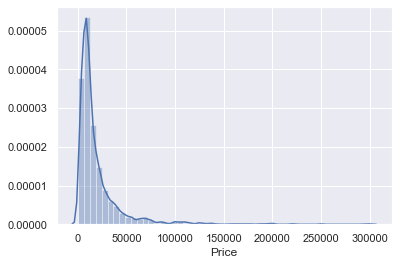

In [6]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

#### Dealing with price outlier

In [7]:
q = data_no_mv['Price'].quantile(0.99)

In [8]:
data_no_outlier_1 = data_no_mv[data_no_mv['Price'] < q]

In [9]:
data_no_outlier_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


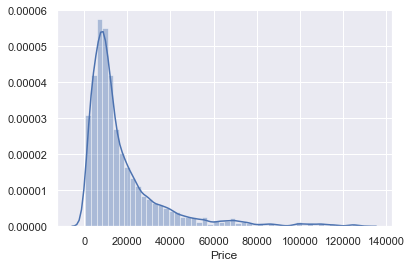

In [10]:
sns.distplot(data_no_outlier_1['Price'])

#### Dealing with mileage outlier

In [11]:
q = data_no_outlier_1['Mileage'].quantile(0.99)
data_no_outlier_2 = data_no_outlier_1[data_no_outlier_1['Mileage'] < q]
data_no_outlier_2.describe()

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


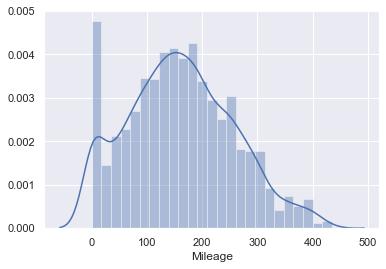

In [12]:
sns.distplot(data_no_outlier_2['Mileage'])

#### Dealing with EngineV outlier

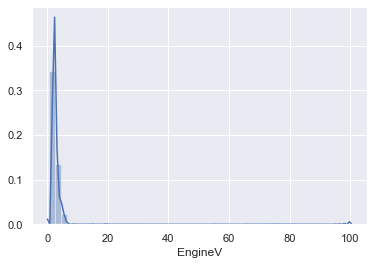

In [13]:
sns.distplot(data_no_outlier_2['EngineV'])

In [14]:
data_no_outlier_3 = data_no_outlier_2[data_no_outlier_2['EngineV'] < 6.5]
data_no_outlier_3.describe()

,Price,Mileage,EngineV,Year
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,17988.421311,161.279776,2.443497,2006.406019
std,19041.658686,96.068269,0.946198,6.595871
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21500.000000,229.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


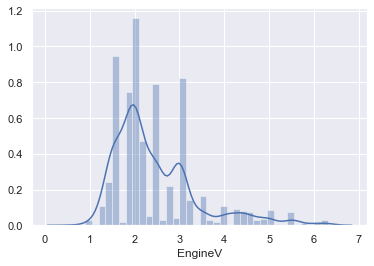

In [15]:
sns.distplot(data_no_outlier_3['EngineV'])

#### Dealing with Year outlier

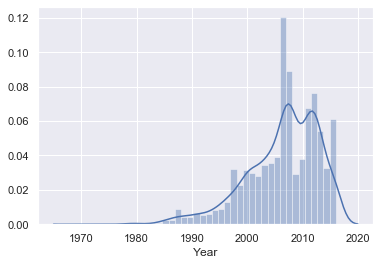

In [16]:
sns.distplot(data_no_outlier_3['Year'])

In [17]:
q = data_no_outlier_3['Year'].quantile(0.01)
data_no_outlier_4 = data_no_outlier_3[data_no_outlier_3['Year'] > q]
data_no_outlier_4.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


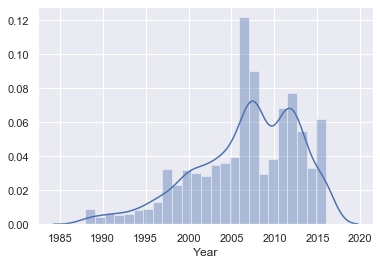

In [18]:
sns.distplot(data_no_outlier_4['Year'])

In [19]:
data_cleaned = data_no_outlier_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


In [20]:
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Checking the OLS assumptions

Text(0.5, 1.0, 'EngineV and Price')

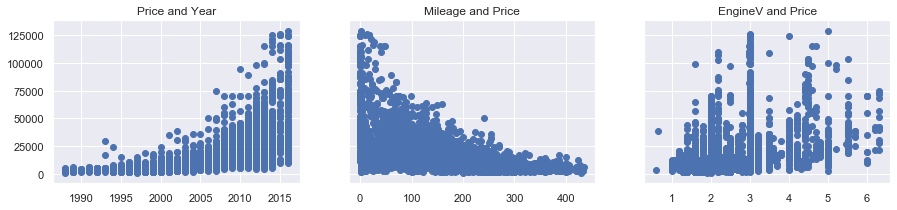

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax2.set_title('Mileage and Price')
ax3.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax3.set_title('EngineV and Price')

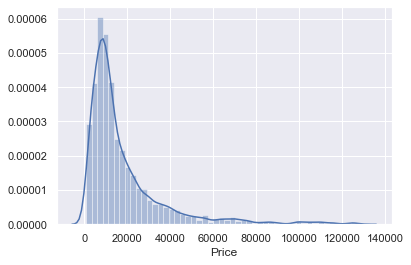

In [22]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [23]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


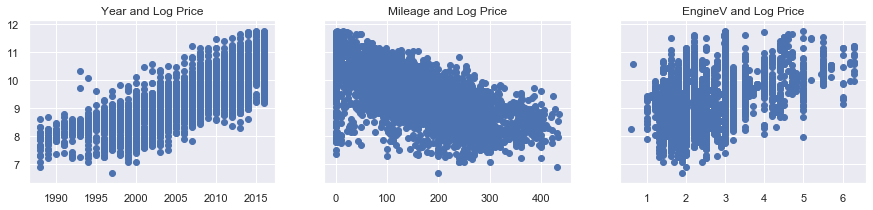

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Year and Log Price')
ax2.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax2.set_title('Mileage and Log Price')
ax3.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax3.set_title('EngineV and Log Price')
plt.show()

### Multicollinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Change year

In [40]:
def decades(year):
    if year >= 1980 and year < 1990:
        return '1980s',1
    elif year >= 1990 and year < 2000:
        return '1990s',2
    elif year >= 2000 and year < 2010:
        return '2000s',3
    elif year >= 2010 and year < 2020:
        return '2010s',4

In [27]:
print(data_cleaned.columns.values)
variables = data_cleaned[['Mileage', 'EngineV', 'Year']]

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

['Brand' 'Price' 'Body' 'Mileage' 'EngineV' 'Engine Type' 'Registration'
 'Year' 'Model' 'log_price']


,VIF,Features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


In [41]:
for index, row in data_cleaned.iterrows():
    (decade,encoded_decade) = decades(row['Year'])
    data_cleaned.loc[index, 'decade'] = decade
    data_cleaned.loc[index, 'encoded_decade'] = encoded_decade

data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price,transformed_year,decade,encoded_decade
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840,1990s,1990s,2.0
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618,1990s,1990s,2.0
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519,2000s,2000s,3.0
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249,2000s,2000s,3.0
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656,2010s,2010s,4.0


In [42]:
variables = data_cleaned[['Mileage', 'EngineV', 'encoded_decade']]

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,2.895770,Mileage
1,6.617424,EngineV
2,5.845438,encoded_decade


In [49]:
# Drop model duel to its high cardinality
data_no_multicollinearity = data_cleaned.drop(['Model', 'Year', 'Price', 'decade'], axis=1)

data_no_multicollinearity.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price,encoded_decade
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,9.415703,3.232221
std,NaN,NaN,95.633291,0.949366,NaN,NaN,0.876616,0.693527
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.684612,1.000000
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,8.881836,3.000000
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,9.367344,3.000000
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,9.985068,4.000000


### Create Dummy Variables

In [50]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,encoded_decade,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,2.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,3.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

In [51]:
y = data_with_dummies['log_price']
x = data_with_dummies.drop(['log_price'], axis=1)

### Scale data

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
x_scaled = scaler.transform(x)

### Train test split

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=365)

### Create a regression

In [57]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)
y_hat = reg.predict(x_train)

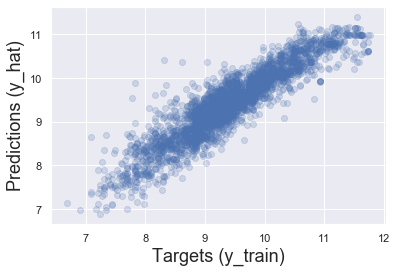

In [59]:
plt.scatter(y_train, y_hat, alpha=0.2)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

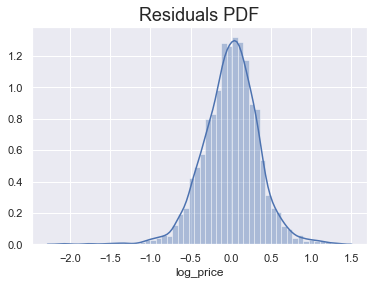

In [60]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)


In [61]:
reg.score(x_train,y_train)

0.8442092440844509

### Finding the weights and bias

In [62]:
reg.intercept_

7.112033466091599

In [64]:
reg_summary = pd.DataFrame(x.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.002285
1,EngineV,0.240060
2,encoded_decade,0.547001
3,Brand_BMW,0.047427
4,Brand_Mercedes-Benz,0.016336
5,Brand_Mitsubishi,-0.431264
6,Brand_Renault,-0.617841
7,Brand_Toyota,-0.183366
8,Brand_Volkswagen,-0.241836
9,Body_hatch,-0.471235


## Testing

In [65]:
y_hat_test = reg.predict(x_test)

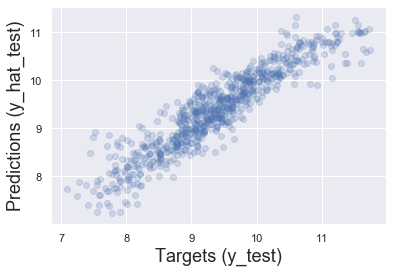

In [66]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [76]:
y_test = y_test.reset_index(drop=True)
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,16543.48,18165.82,1622.34,27.60
std,13844.54,19967.86,10656.64,29.26
min,1379.17,1200.00,-41004.04,0.01
25%,6647.74,6900.00,-2260.26,9.47
50%,12033.19,11600.00,152.66,20.23
75%,22117.66,20500.00,2152.02,34.96
max,81504.04,126000.00,85215.00,304.44


In [77]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
428,1649.80,1650.00,0.20,0.01
131,27517.60,27500.00,-17.60,0.06
683,44758.63,44800.00,41.37,0.09
610,8180.49,8200.00,19.51,0.24
97,2692.78,2700.00,7.22,0.27
146,11933.15,11900.00,-33.15,0.28
427,2708.00,2700.00,-8.00,0.30
602,13249.64,13300.00,50.36,0.38
264,42208.07,42000.00,-208.07,0.50
261,48287.07,48535.50,248.43,0.51
